In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./dataset/student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### No missing values

In [6]:
df.duplicated().sum() #check for duplicates

np.int64(0)

### No duplicated values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
## Check statistics of the data

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring data

In [10]:
print("Categories of gender: ",end="")
print(df['gender'].unique())

print("Categories of race_ethnicity: ",end="")
print(df['race_ethnicity'].unique())

print("Categories of parental_level_of_education: ",end="")
print(df['parental_level_of_education'].unique())

print("Categories of lunch: ",end="")
print(df['lunch'].unique())

print("Categories of test_preparation_course: ",end="")
print(df['test_preparation_course'].unique())

Categories of gender: ['female' 'male']
Categories of race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch: ['standard' 'free/reduced']
Categories of test_preparation_course: ['none' 'completed']


In [11]:
## Define numerical and categorical columns

numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("There are {} numerical features: {}".format(len(numerical),numerical))
print("There are {} categorical features: {}".format(len(categorical),categorical))

There are 3 numerical features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for total marks and average

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [13]:
reading_score = df[df['reading_score'] == 100]['total_score'].count()
writing_score = df[df['writing_score'] == 100]['total_score'].count()
math_score = df[df['math_score'] == 100]['total_score'].count()

print("Number of students who scored 100 in reading: ",reading_score)
print("Number of students who scored 100 in writing: ",writing_score)
print("Number of students who scored 100 in math: ",math_score)

Number of students who scored 100 in reading:  17
Number of students who scored 100 in writing:  14
Number of students who scored 100 in math:  7


In [14]:
reading_score_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_score_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_score_less_20 = df[df['math_score']<=20]['average_score'].count()

print("Number of students who scored less than 20 in reading: ",reading_score_less_20)
print("Number of students who scored less than 20 in writing: ",writing_score_less_20)
print("Number of students who scored less than 20 in math: ",math_score_less_20)

Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in math:  4


## Insights
### 1. Students performed worst in math
### 2. Students performed best in reading

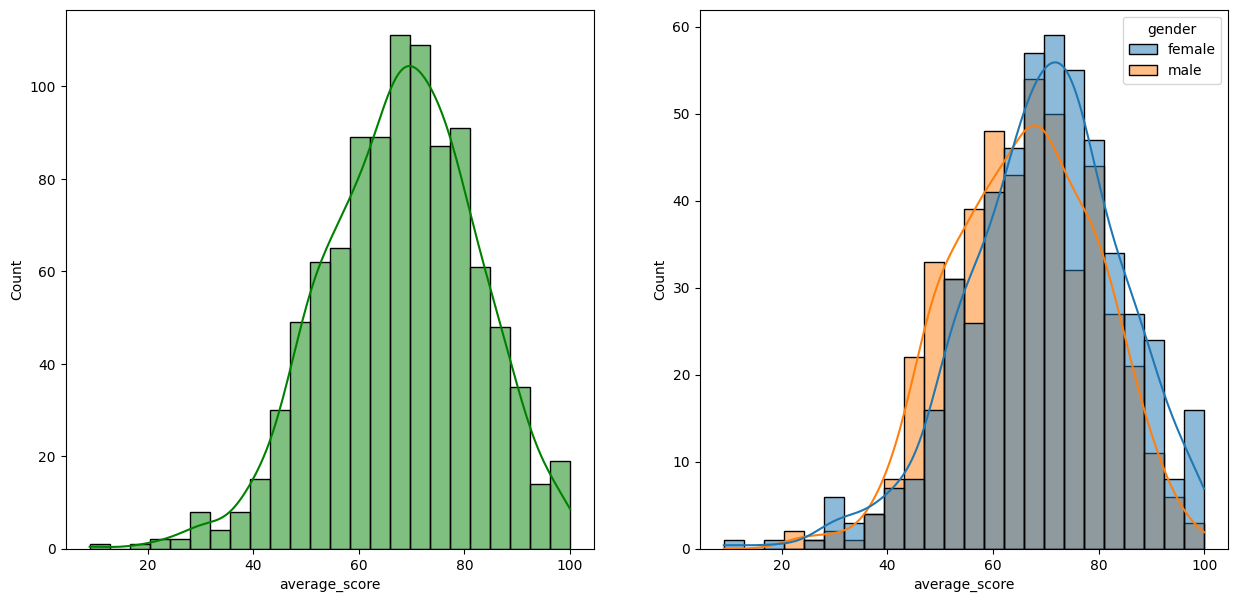

In [15]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

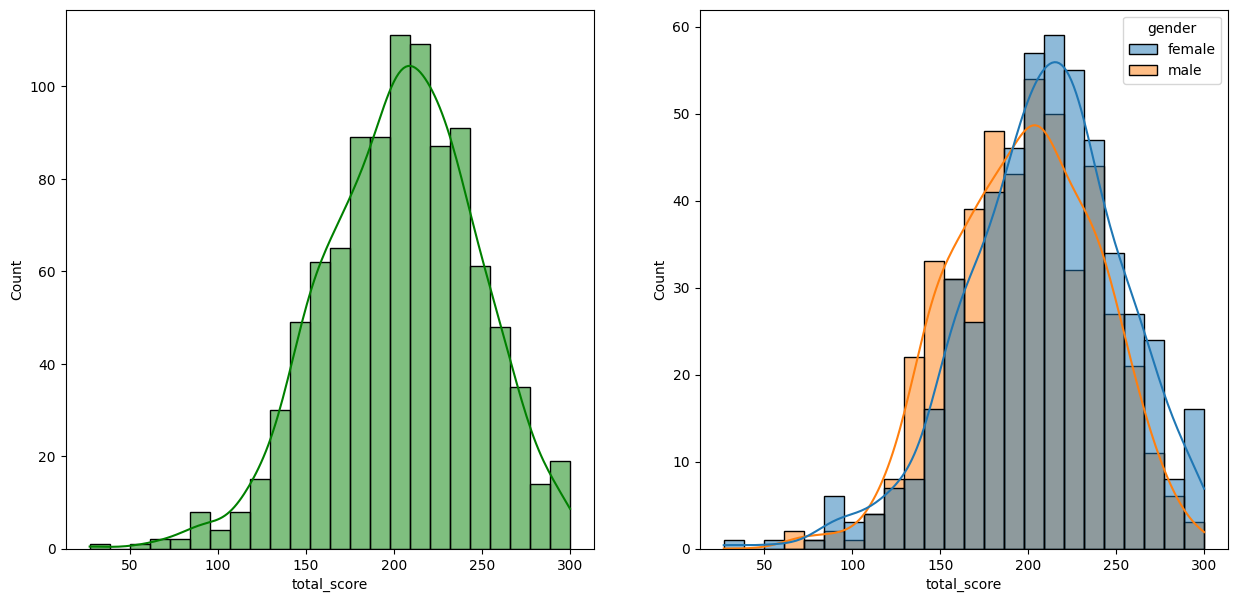

In [16]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

## Insights:
### 1. Females have scored better than male students.

Text(0.5, 1.0, 'Average Score vs Lunch for female')

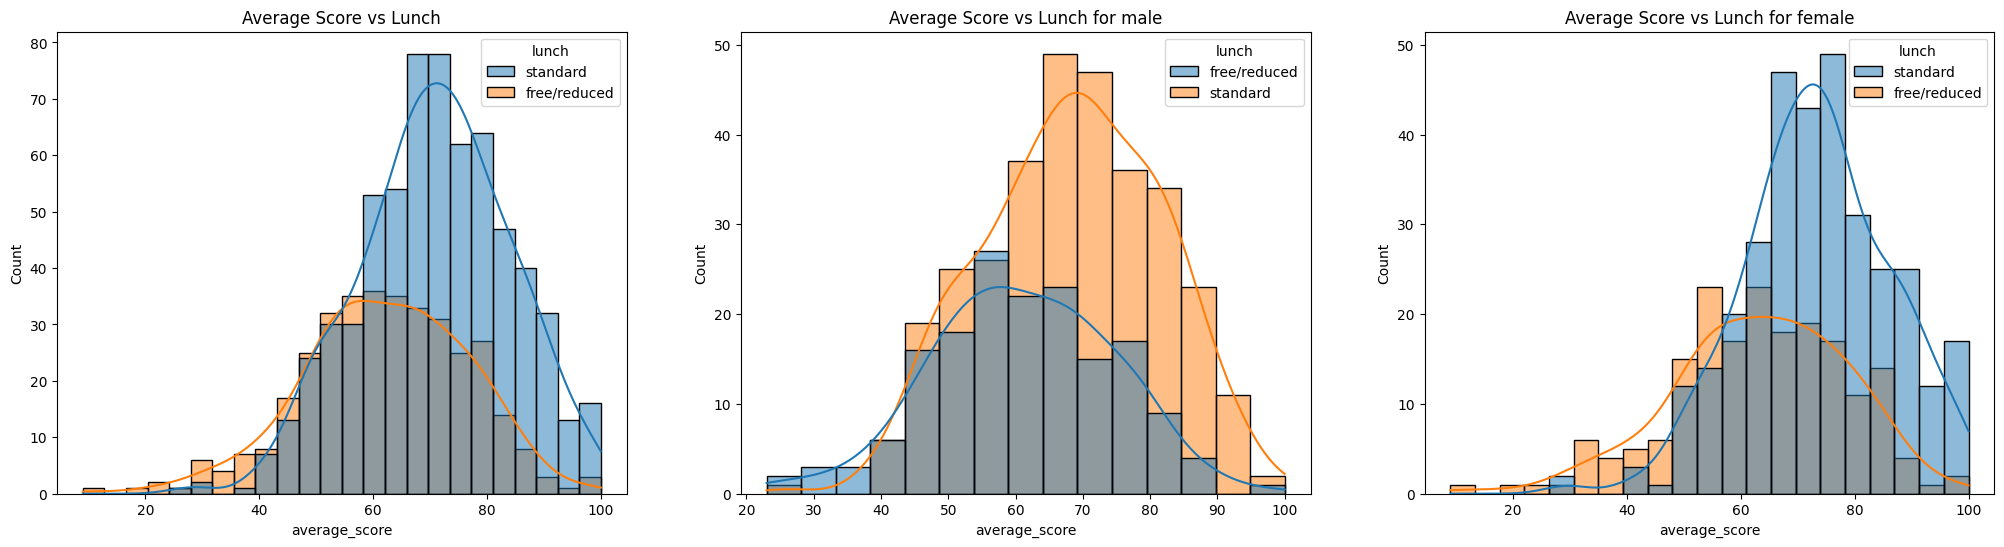

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.title('Average Score vs Lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.title('Average Score vs Lunch for male')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.title('Average Score vs Lunch for female')

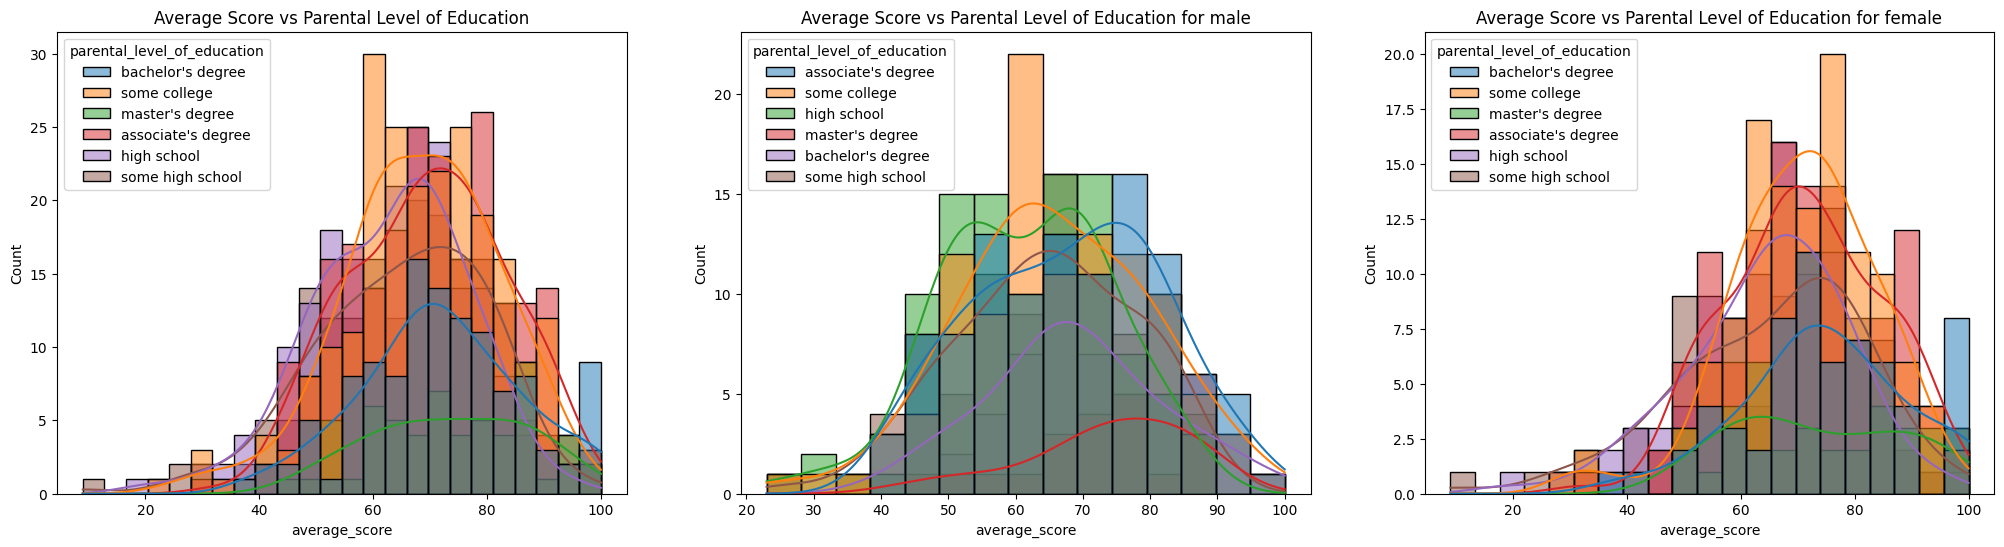

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Average Score vs Parental Level of Education')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Average Score vs Parental Level of Education for male')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Average Score vs Parental Level of Education for female')

plt.show()

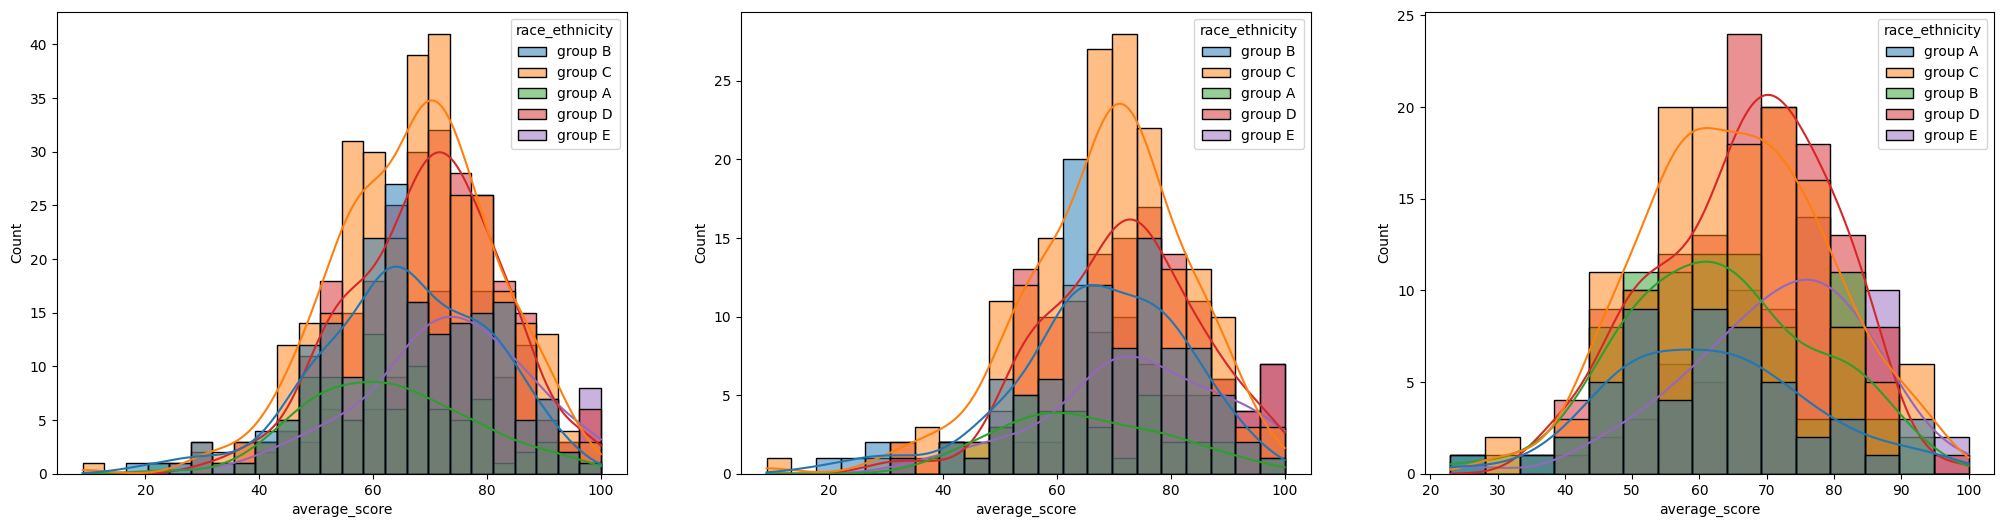

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

## Insights:

### 1. Students of group A and group B tends to perform poorly in exam.
### 2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximumum score of students in all three subjects

<Axes: ylabel='writing_score'>

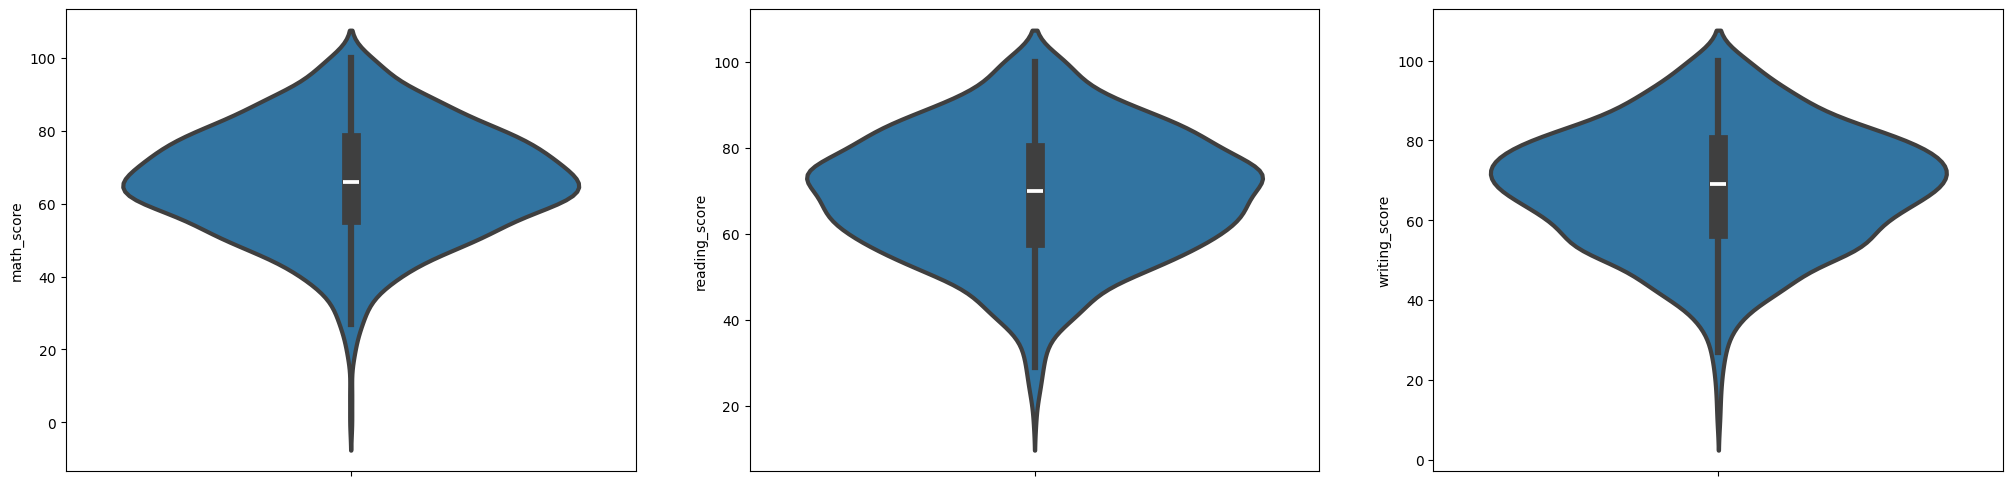

In [20]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.violinplot(data=df,y='math_score',linewidth=3)
plt.subplot(132)
sns.violinplot(data=df,y='reading_score',linewidth=3)
plt.subplot(133)
sns.violinplot(data=df,y='writing_score',linewidth=3)

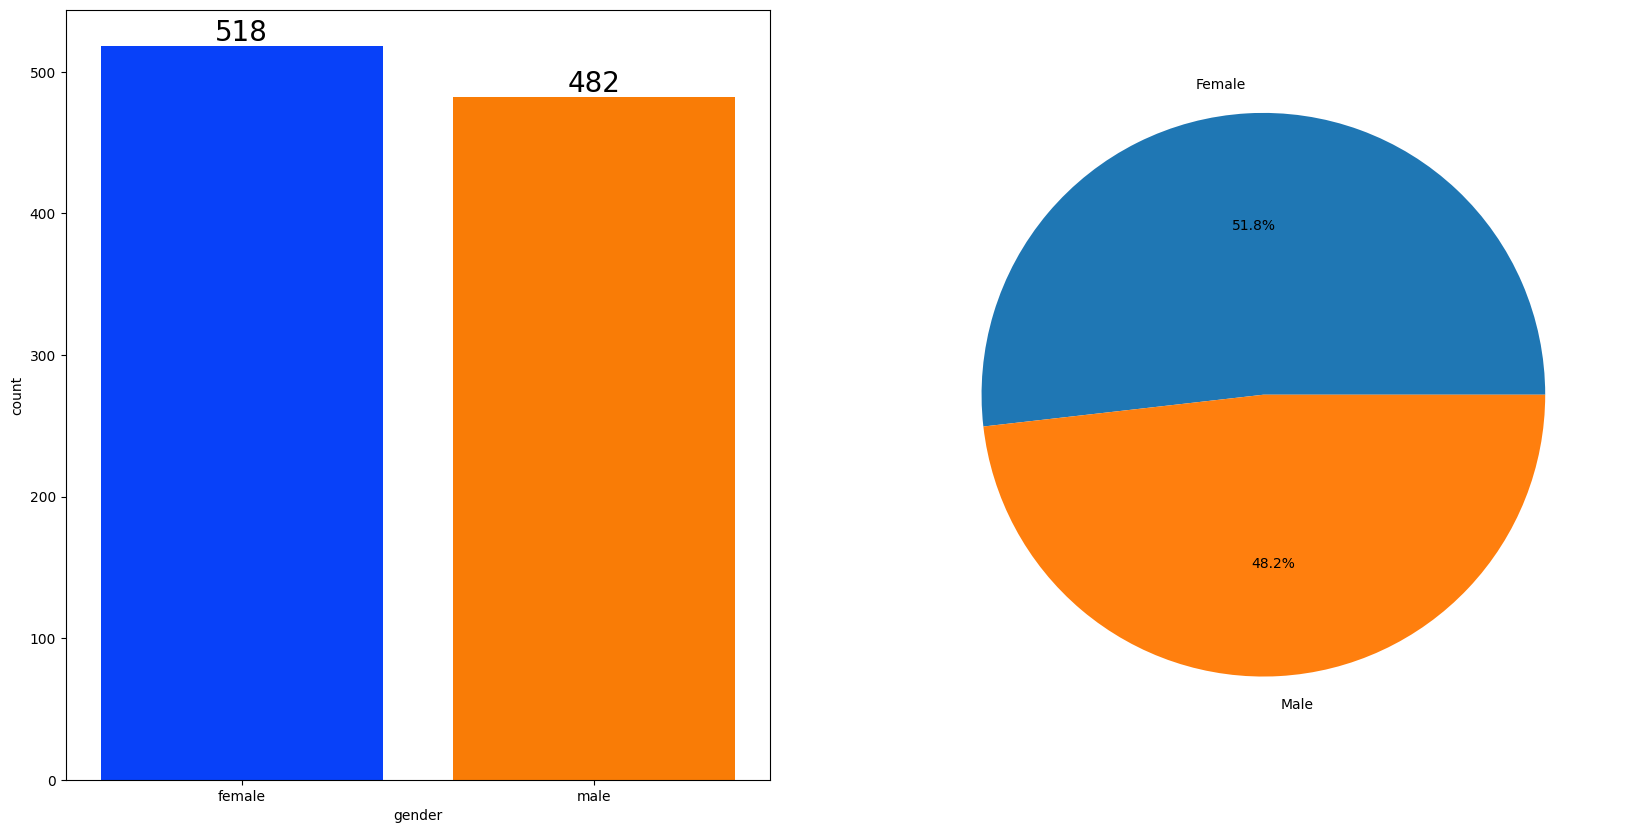

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(
    x=df['gender'].value_counts(),
    labels=['Female','Male'],
    autopct='%1.1f%%',
)

plt.show()

In [41]:
# Calculate average scores for male and female students
average_scores_by_gender = df.groupby('gender')['average_score'].mean()
average_scores_by_gender

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

In [49]:
average_scores_by_subject_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
average_scores_by_subject_gender

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [59]:
female_scores = average_scores_by_subject_gender.iloc[0]
male_scores = average_scores_by_subject_gender.iloc[1]

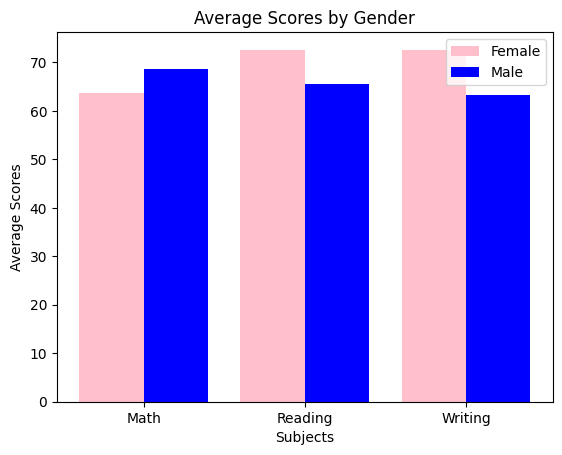

In [60]:
categories = ['Math', 'Reading', 'Writing']  #
# X positions for the categories
x = np.arange(len(categories))  # Create an array of indices [0, 1, 2]

# Width of the bars
bar_width = 0.4

# Create the bar plot
plt.bar(x - bar_width / 2, female_scores, width=bar_width, label='Female', color='pink')
plt.bar(x + bar_width / 2, male_scores, width=bar_width, label='Male', color='blue')

# Add labels and legend
plt.xticks(x, categories)  # Set category labels for the x-axis
plt.xlabel('Subjects')
plt.ylabel('Average Scores')
plt.title('Average Scores by Gender')
plt.legend()

## Insights

### 1. Males scored higher in math
### 2. Females scored higher in reading and writing

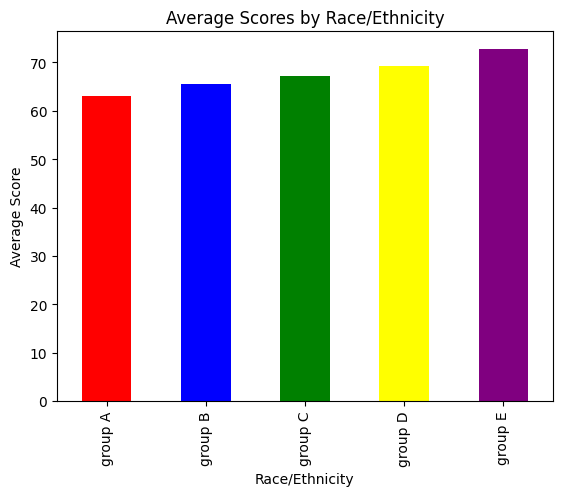

In [ ]:
average_scores_by_race = df.groupby('race_ethnicity')['average_score'].mean()
average_scores_by_race.plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'purple'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.title('Average Scores by Race/Ethnicity')
plt.show()

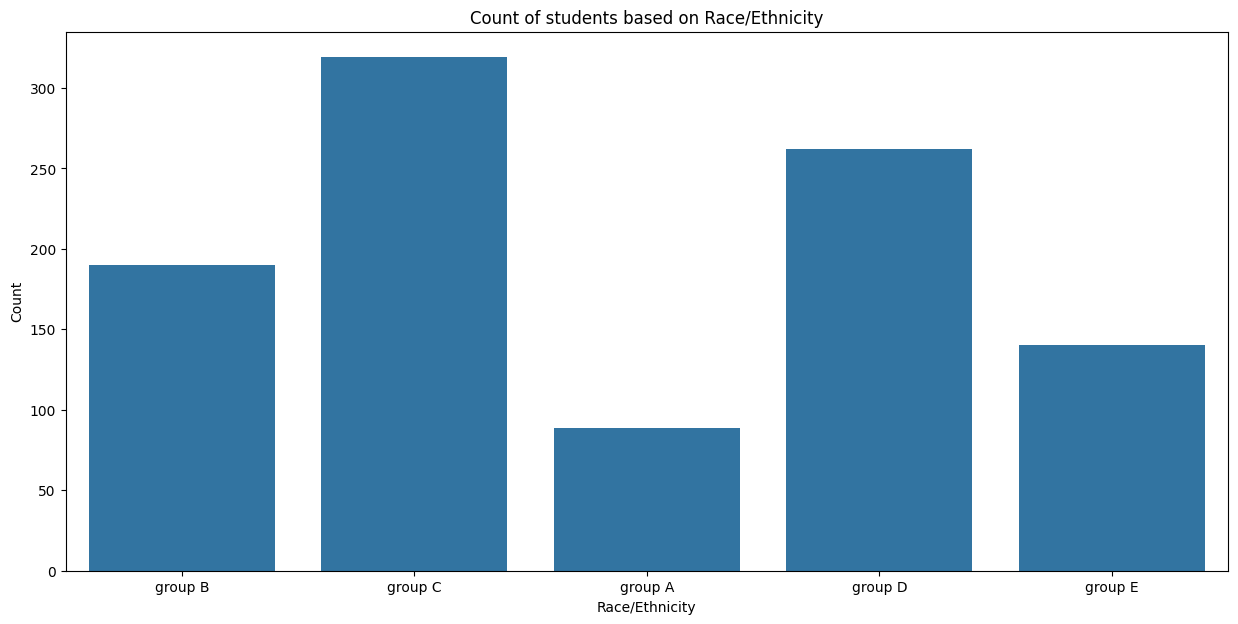

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='race_ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Count of students based on Race/Ethnicity')
plt.show()

## Insights
### 1. Group A has the least number of students
### 2. Group C has the highest number of students

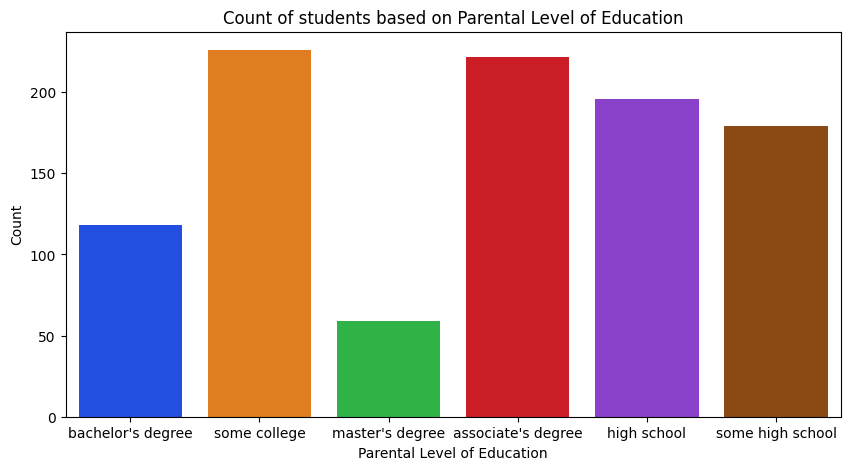

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='parental_level_of_education',palette='bright')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.title('Count of students based on Parental Level of Education')
plt.show()

## Insights

### Most of the students have parental level of education as 'some college' and 'associate's degree'.

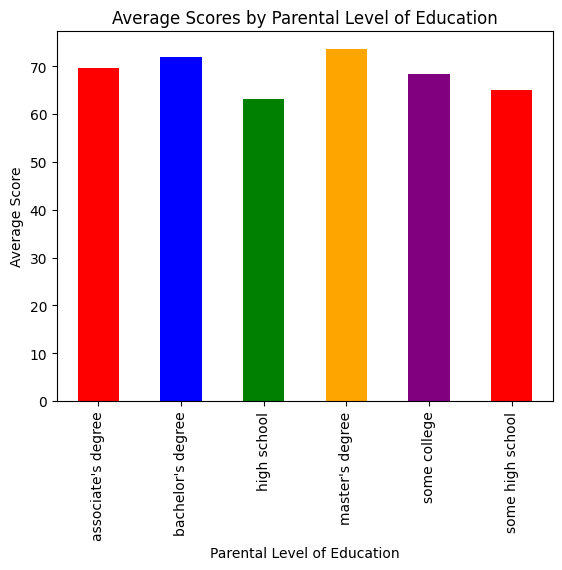

In [79]:
average_score_by_parental_level = df.groupby('parental_level_of_education')['average_score'].mean()
average_score_by_parental_level.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.title('Average Scores by Parental Level of Education')
plt.show()

## Insights

### 1. Max average score is of parents with master's degree 
### 2. Min average score is of parents with high school degree

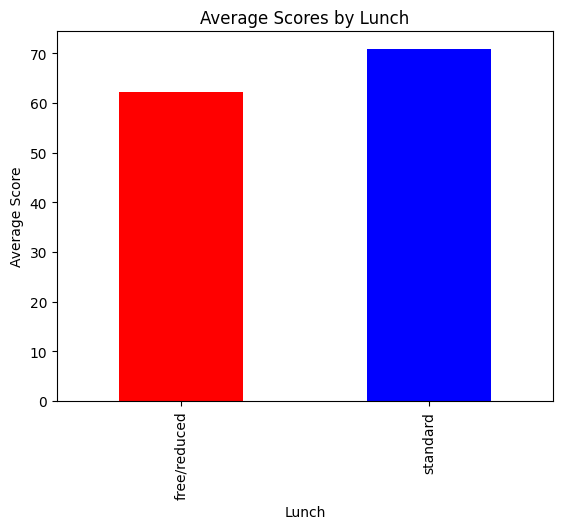

In [81]:
average_score_by_lunch = df.groupby('lunch')['average_score'].mean()
average_score_by_lunch.plot(kind='bar',color=['red','blue'])
plt.xlabel('Lunch')
plt.ylabel('Average Score')
plt.title('Average Scores by Lunch')
plt.show()

## Insights
### 1. Students with standard lunch have higher average scores compared to students with free/reduced lunch.

### Check the distribution of scores based on lunch

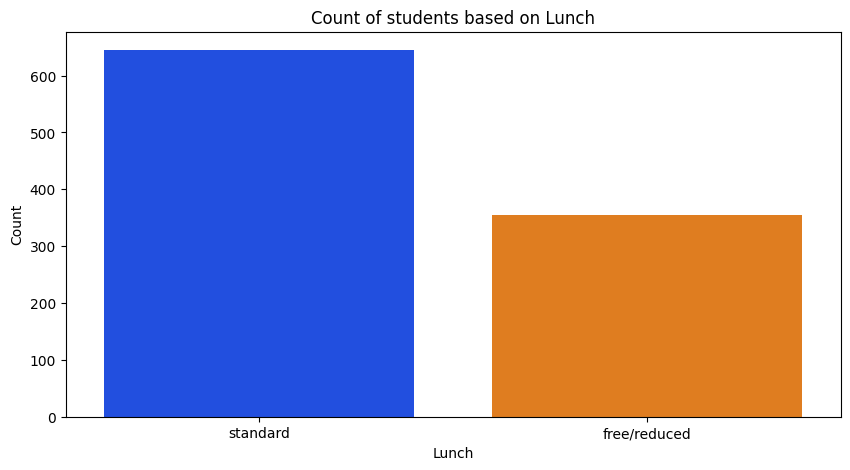

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='lunch',palette='bright')
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.title('Count of students based on Lunch')
plt.show()

## Insights
### 1. Students are more in number with standard lunch

In [69]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

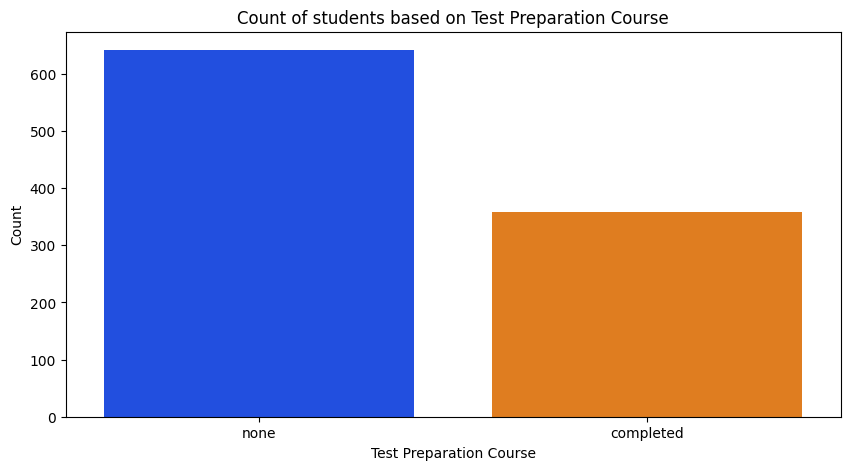

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='test_preparation_course',palette='bright')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Count of students based on Test Preparation Course')
plt.show()

## Insights
### 1. More number students didn't take the test preparation course

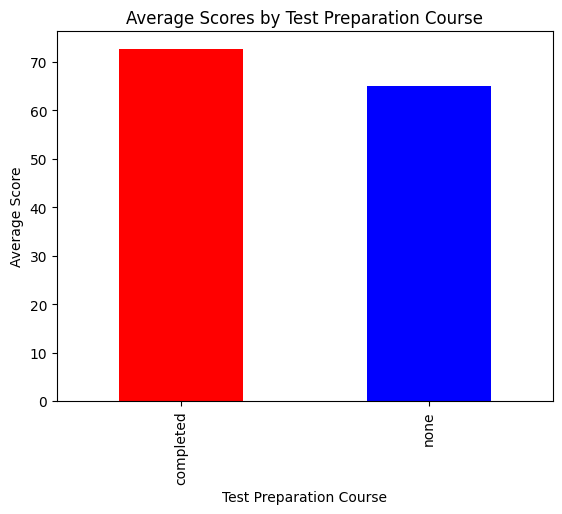

In [87]:
average_score_by_test_preparation_course = df.groupby('test_preparation_course')['average_score'].mean()
average_score_by_test_preparation_course.plot(kind='bar',color=['red','blue'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.title('Average Scores by Test Preparation Course')
plt.show()

## Insights

### Students who completed the Test preparation ourse tends to score higher

## Detecting outliers

Text(0.5, 1.0, 'Average Score')

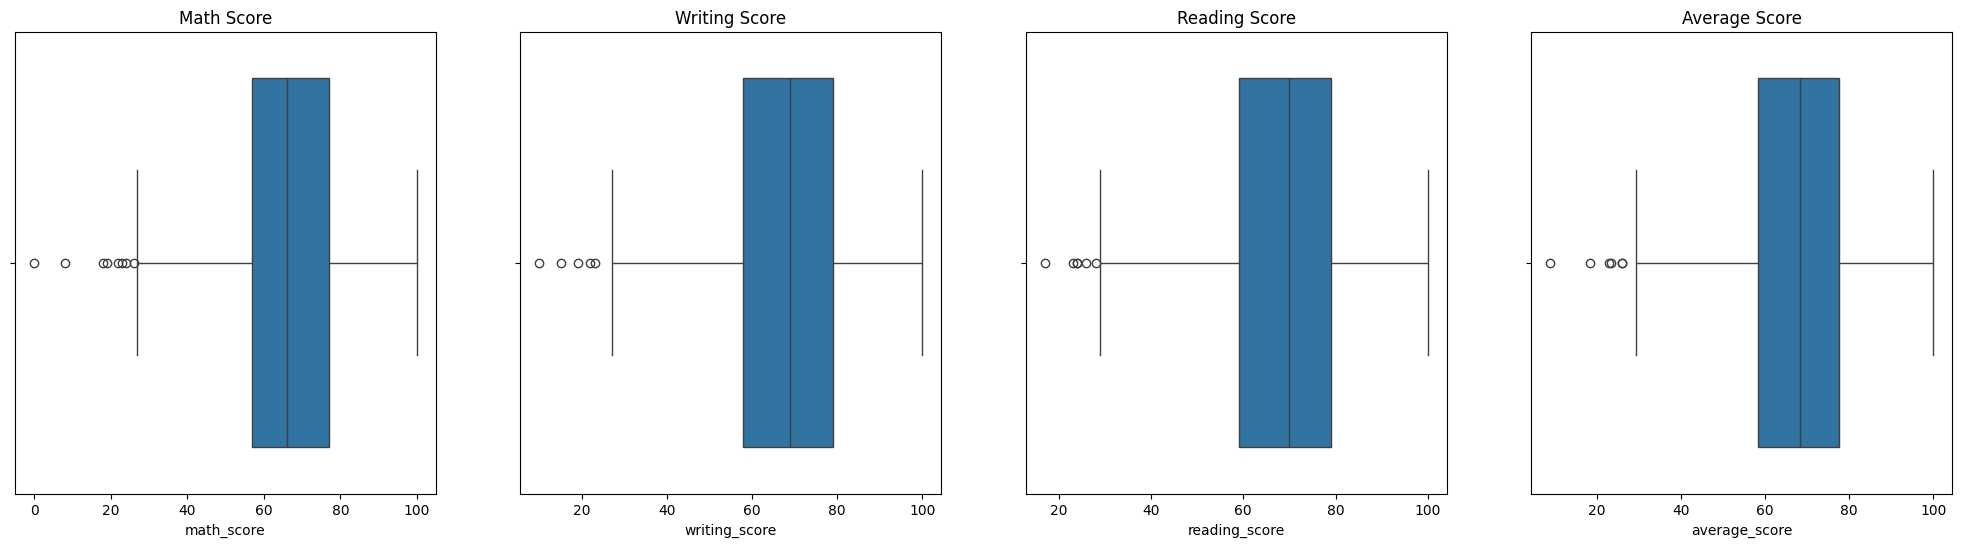

In [90]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.boxplot(data=df,x='math_score')
plt.title('Math Score')
plt.subplot(142)
sns.boxplot(data=df,x='writing_score')
plt.title('Writing Score')
plt.subplot(143)
sns.boxplot(data=df,x='reading_score')
plt.title('Reading Score') 
plt.subplot(144)
sns.boxplot(data=df,x='average_score')
plt.title('Average Score')

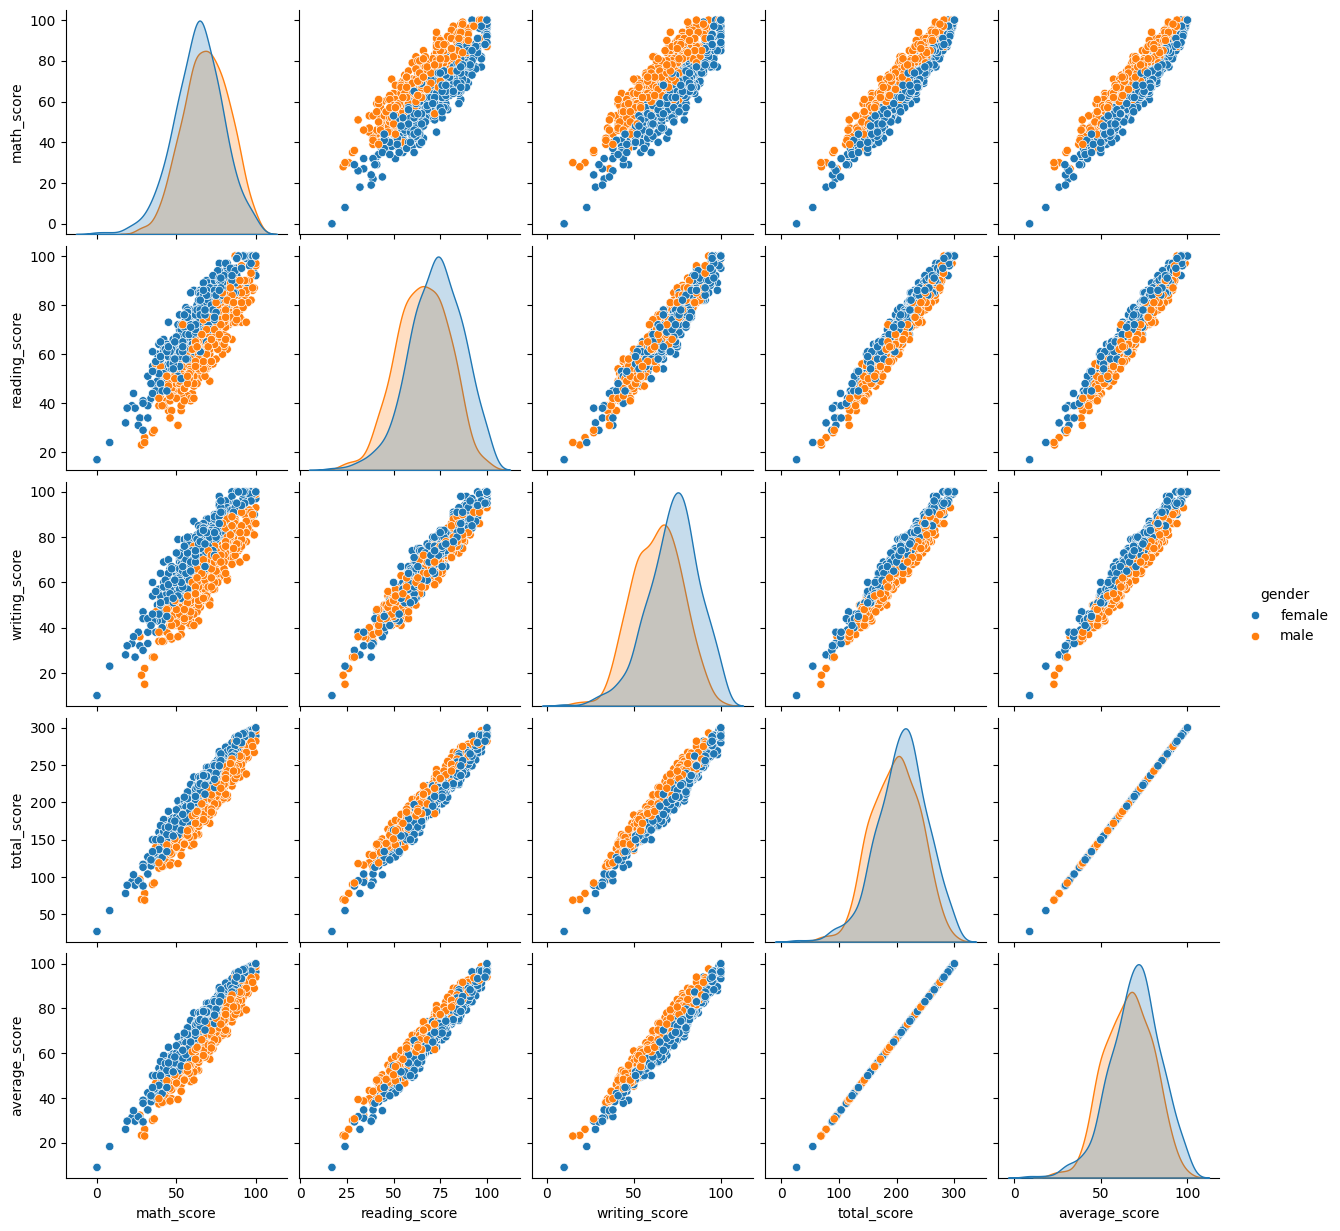

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights

### Linear relationship between scores and gender

In [92]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

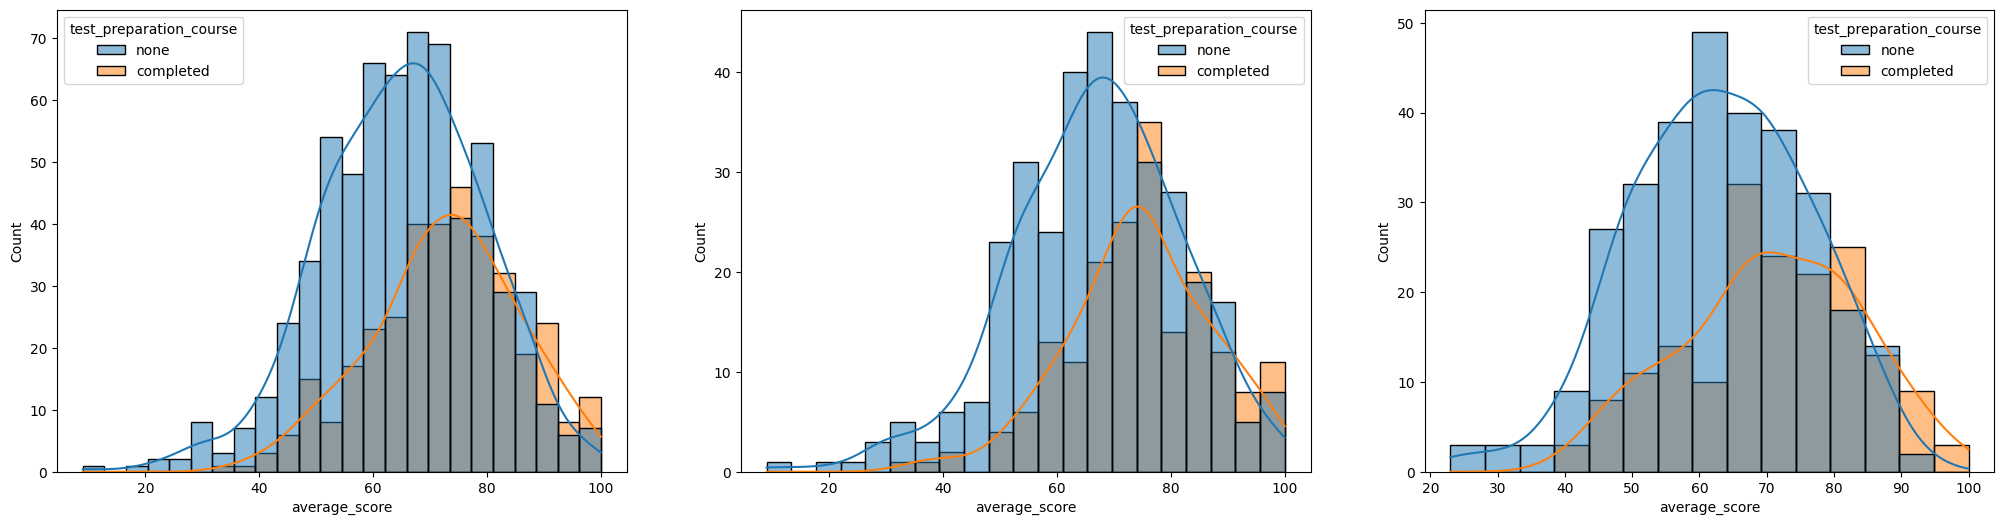

In [93]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test_preparation_course')
plt.show()

## Conclusion

### 1. Gender, Race/Ethnicity, Parental Level of Education and Lunch are the features with which student's performance depends.
### 2. Females lead in pass percentage and also are top-scorers
### 3. Student's Performance is not much related with test preparation course